In [76]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

In [77]:
# Question 1
Measure = pd.read_csv("Measurement_Q1.csv")
Measure.head()

,Time,Measurement
0,1,1.84
1,2,3.93
2,3,4.00
3,4,5.42
4,5,6.89


In [78]:
# (a)
arima_measure =ARIMA(Measure.Measurement, order=(0,1,1))
print(arima_measure.fit().summary())

                             ARIMA Model Results                              
Dep. Variable:          D.Measurement   No. Observations:                  149
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Wed, 12 Oct 2022   AIC                            411.215
Time:                        19:35:28   BIC                            420.227
Sample:                             1   HQIC                           414.876
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.D.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                

In [79]:
# Yt = -0.0064 +εt +0.7531 εt-1

Text(0,0.5,'First diff of Measurement')

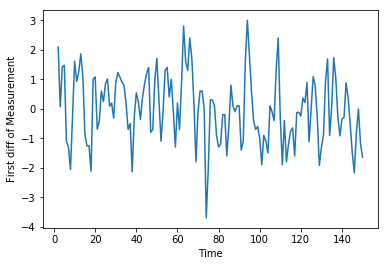

In [80]:
# (b)
diff_first = Measure['Measurement'].diff(1)
plt.plot(Measure.Time,diff_first)
plt.xlabel("Time")
plt.ylabel("First diff of Measurement")

In [81]:
# Yt = -0.0064 +εt +0.7531 εt-1

In [82]:
# (c)
diff_first.dropna(inplace=True)
model_first_diff = ARIMA(diff_first, order=(0,0,1))
print(model_first_diff.fit().summary())

                              ARMA Model Results                              
Dep. Variable:            Measurement   No. Observations:                  149
Model:                     ARMA(0, 1)   Log Likelihood                -202.607
Method:                       css-mle   S.D. of innovations              0.940
Date:                Wed, 12 Oct 2022   AIC                            411.215
Time:                        19:35:33   BIC                            420.227
Sample:                             0   HQIC                           414.876
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0064      0.135     -0.048      0.962      -0.270       0.257
ma.L1.Measurement     0.7531      0.069     10.930      0.000       0.618       0.888
                        

/software/anaconda3/5.3.0/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [83]:
# (d) The two models give the same parameters since IMA(1,1)
#     is Moving Average Process with first order differencing
#     and MA(1), Moving Average Process, performed on first 
#     difference is the same thing as directly IMA(1,1) on 
#     original dataset.

In [84]:
# Question 2
temp = pd.read_csv("GlobalAirTemperature.csv")
temp.head()

,Year,"Anomaly, C"
0,1880,-0.11
1,1881,-0.13
2,1882,-0.01
3,1883,-0.04
4,1884,-0.42


In [85]:
# (a)
model2 = ARIMA(temp['Anomaly, C'], order=(0,1,1))
model2_fit = model2.fit()
residual2 = model2_fit.resid
SSE = np.sum(residual2**2)
SSE

2.1895168756516403

In [86]:
#(b)
model3 = ARIMA(temp['Anomaly, C'], order=(0,1,2))
model3_fit = model3.fit()
residual3 = model3_fit.resid
SSE = np.sum(residual3**2)
SSE

2.057000656090614

In [87]:
# (c) model(b) is better suited for this data since 
#     SSE is smaller than that of model(a) which 
#     means that it predicts closer to actual values

In [88]:
# Question 3
Measure_Q3 = pd.read_csv("Measurement_Q3.csv")
Measure_Q3.head()

,Year,Measurement
0,1950,2.429415
1,1951,2.363364
2,1952,2.374305
3,1953,2.295520
4,1954,2.329716


Text(0,0.5,'Measurement')

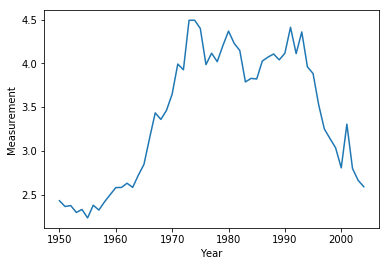

In [89]:
# (a)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime
plt.plot(Measure_Q3['Year'],Measure_Q3['Measurement'])
plt.xlabel("Year")
plt.ylabel("Measurement")

Figure(432x288)
Figure(432x288)


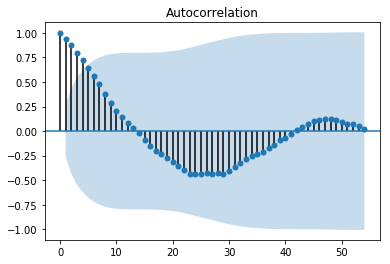

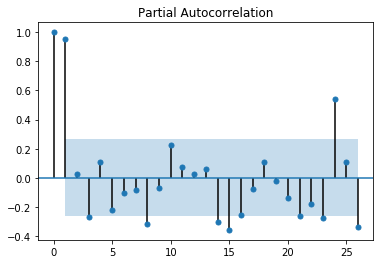

In [90]:
acf = plot_acf(Measure_Q3['Measurement'])
pacf = plot_pacf(Measure_Q3['Measurement'],lags=26)
print(acf)
print(pacf)

Figure(432x288)
Figure(432x288)


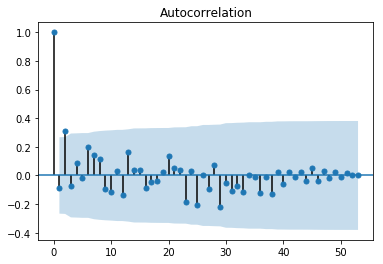

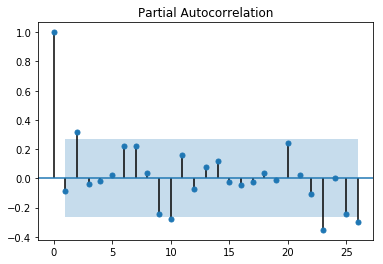

In [91]:
# (b)
first_diff = Measure_Q3.Measurement.diff(1)
first_diff.dropna(inplace=True)
acf_first = plot_acf(first_diff)
pacf_first = plot_pacf(first_diff,lags=26)
print(acf_first)
print(pacf_first)

In [92]:
# (c) We have stationary ACF after first differentiation
#     so we have d = 1. ACF cuts off after lag=2, and PACF
#     cuts off after lag=2. So the recommended model is 
#     ARMA(2,1,2)